<a href="https://colab.research.google.com/github/maralhi/Sensors_models/blob/main/01_Data_Exploration_and_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pject "Sensors"

Content:

Load and inspect the data

General overview of the dataset

Exploratory Data Analysis (EDA)

Data preprocessing

Objective:  Prepare the data for analysis and modeling.

#1. Framing the Problem

Problem: Predicting failures in advance using machine-derived data

Problem Type: Supervised with Classification

Data Source: Kaggle

Data Type: CSV, Tables

# 2. Load data and unload libraries. Read and write

In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('sensors.csv', sep=';')
print(df)

     footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
0           0         7   7    1   6    6  36   3            1     1
1         190         1   3    3   5    1  20   4            1     0
2          31         7   2    2   6    1  24   6            1     0
3          83         4   3    4   5    1  28   6            1     0
4         640         7   5    6   4    0  68   6            1     0
..        ...       ...  ..  ...  ..  ...  ..  ..          ...   ...
939         0         7   7    1   6    4  73   6           24     1
940         0         7   5    2   6    6  50   6           24     1
941         0         3   6    2   7    5  43   6           24     1
942         0         6   6    2   5    6  46   7           24     1
943        18         7   4    2   6    3  61   7           24     1

[944 rows x 10 columns]


# 2.1. Variables/Parameters

**Variable/parameter index:**

footfall: The number of people or objects passing by the machine.

tempMode: The temperature mode or setting of the machine.

AQ: Air quality index near the machine.

USS: Ultrasonic sensor data, indicating proximity measurements.

CS: Current sensor readings, indicating the electrical current usage of the machine.

VOC: Volatile organic compounds level detected near the machine.

RP: Rotational position or RPM (revolutions per minute) of the machine parts.

IP: Input pressure to the machine.

Temperature: The operating temperature of the machine.

fail: Binary indicator of machine failure (1 for failure, 0 for no failure).

# 2.2. Possible Hypotheses

**Possible Hypotheses**

Hypotheses about relationships between variables and failure:
- High VOC (volatile organic compound) levels are associated with a higher probability of failure.

- Machines with extreme (very high or low) levels of footfall (probably the number of people or activity) fail more frequently.

- Certain combinations of tempMode and Temperature are associated with a higher probability of failure.

- Failures are more frequent in certain phases of PI (process identification).

# 3. EDA (Exploratory Data Analysis)

# 3.1. Initial cleanup (correcting nulls, data types, duplicates, obvious errors)

In [ ]:
print("DataFrame Overview:")
print(df.info())
print("First rows:")
display(df.head())

print("Null values ​​by column:")
print(df.isnull().sum())

print("Percentage of nulls by column:")
print((df.isnull().mean() * 100).round(2).sort_values(ascending=False))

print("Data types by column:")
print(df.dtypes)

duplicates = df.duplicated()
print(f"Duplicate rows: {duplicates.sum()}")
df = df.drop_duplicates()


DataFrame Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB
None
First rows:


,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


Null values ​​by column:
footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64
Percentage of nulls by column:
footfall       0.0
tempMode       0.0
AQ             0.0
USS            0.0
CS             0.0
VOC            0.0
RP             0.0
IP             0.0
Temperature    0.0
fail           0.0
dtype: float64
Data types by column:
footfall       int64
tempMode       int64
AQ             int64
USS            int64
CS             int64
VOC            int64
RP             int64
IP             int64
Temperature    int64
fail           int64
dtype: object
Duplicate rows: 1


In [ ]:
def clean_df(df):
    print("INITIAL DATAFRAME CLEANUP")

    print("\n General Info:")
    print(df.info())

    print("\n Nulls per column:")
    print(df.isnull().sum())

    print("\n Percentage of nulls:")
    print((df.isnull().mean() * 100).round(2).sort_values(ascending=False))

    print("\n Data Types:")
    print(df.dtypes)

    duplicates = df.duplicated()
    print(f"\n Duplicates found: {duplicates.sum()}")
    df = df.drop_duplicates()

    print("\n Basic cleanup completed.")
    return df

df = clean_df(df)


INITIAL DATAFRAME CLEANUP

 General Info:
<class 'pandas.core.frame.DataFrame'>
Index: 943 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     943 non-null    int64
 1   tempMode     943 non-null    int64
 2   AQ           943 non-null    int64
 3   USS          943 non-null    int64
 4   CS           943 non-null    int64
 5   VOC          943 non-null    int64
 6   RP           943 non-null    int64
 7   IP           943 non-null    int64
 8   Temperature  943 non-null    int64
 9   fail         943 non-null    int64
dtypes: int64(10)
memory usage: 81.0 KB
None

 Nulls per column:
footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64

 Percentage of nulls:
footfall       0.0
tempMode       0.0
AQ             0.0
USS            0.0
CS             0.0
VOC         

# 3.2. Descriptive analysis

In [ ]:
df.head(11)

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
5,110,3,3,4,6,1,21,4,1,0
6,100,7,5,6,4,1,77,4,1,0
7,31,1,5,4,5,4,21,4,1,0
8,180,7,4,6,3,3,31,4,1,0
9,2800,0,3,3,7,0,39,3,1,0


In [ ]:
df.head(11)
def descriptive_analysis(df):
  import pandas as pd

  print("DESCRIPTIVE ANALYSIS\n")

  print("Numeric Statistics:")
  display(df.describe().T)

  print("\n Categorical Statistics:")
  cat_cols = df.select_dtypes(include='object').columns
  for col in cat_cols:
    print(f"\n Column: {col}")
    print(df[col].value_counts())
    print(f"Unique Values: {df[col].nunique()}")

  print("\n Unique Values ​​per Column:")
  print(df.nunique())

  print("\n Possible outliers per column (based on IQR):")
  for col in df.select_dtypes(include='number').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = ((df[col] < (q1 - 1.5 * iqr)) | (df[col] > (q3 + 1.5 * iqr))).sum()
    print(f"{col}: {outliers} outliers")

  if df.select_dtypes(include='number').shape[1] > 1:
    print("\n Correlation matrix:")
    display(df.corr(numeric_only=True).round(2))

  print("\n End of descriptive analysis.")

In [ ]:
descriptive_analysis(df)

DESCRIPTIVE ANALYSIS

Numeric Statistics:


,count,mean,std,min,25%,50%,75%,max
footfall,943.0,306.673383,1083.144024,0.0,1.0,22.0,110.0,7300.0
tempMode,943.0,3.726405,2.678334,0.0,1.0,3.0,7.0,7.0
AQ,943.0,4.326617,1.438551,1.0,3.0,4.0,6.0,7.0
USS,943.0,2.939555,1.384458,1.0,2.0,3.0,4.0,7.0
CS,943.0,5.393425,1.269869,1.0,5.0,6.0,6.0,7.0
VOC,943.0,2.844115,2.273751,0.0,1.0,2.0,5.0,6.0
RP,943.0,47.042418,16.431816,19.0,34.0,44.0,58.0,91.0
IP,943.0,4.564157,1.599452,1.0,3.0,4.0,6.0,7.0
Temperature,943.0,16.326617,5.976014,1.0,14.0,17.0,21.0,24.0
fail,943.0,0.416755,0.493283,0.0,0.0,0.0,1.0,1.0



 Categorical Statistics:

 Unique Values ​​per Column:
footfall       99
tempMode        8
AQ              7
USS             7
CS              7
VOC             7
RP             71
IP              7
Temperature    24
fail            2
dtype: int64

 Possible outliers per column (based on IQR):
footfall: 154 outliers
tempMode: 0 outliers
AQ: 0 outliers
USS: 0 outliers
CS: 87 outliers
VOC: 0 outliers
RP: 0 outliers
IP: 0 outliers
Temperature: 48 outliers
fail: 0 outliers

 Correlation matrix:


,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
footfall,1.00,0.02,-0.07,0.02,0.03,-0.09,-0.04,-0.00,-0.02,-0.07
tempMode,0.02,1.00,-0.01,0.00,-0.01,-0.05,0.41,-0.06,-0.06,-0.01
AQ,-0.07,-0.01,1.00,-0.16,-0.09,0.62,0.09,-0.11,0.04,0.58
USS,0.02,0.00,-0.16,1.00,-0.35,-0.40,-0.03,-0.21,-0.23,-0.47
CS,0.03,-0.01,-0.09,-0.35,1.00,0.05,-0.03,0.19,0.14,0.02
VOC,-0.09,-0.05,0.62,-0.40,0.05,1.00,0.01,0.10,0.21,0.80
RP,-0.04,0.41,0.09,-0.03,-0.03,0.01,1.00,-0.16,-0.08,0.05
IP,-0.00,-0.06,-0.11,-0.21,0.19,0.10,-0.16,1.00,0.37,0.09
Temperature,-0.02,-0.06,0.04,-0.23,0.14,0.21,-0.08,0.37,1.00,0.19
fail,-0.07,-0.01,0.58,-0.47,0.02,0.80,0.05,0.09,0.19,1.00



 End of descriptive analysis.


# 3.3 Univariate analysis

A) Univariate analysis for numerical variables


Analysis column: footfall
Mean: 306.3813559322034
Median: 22.0
Mode: 0
Unique values: 99
Number of outliers: 154


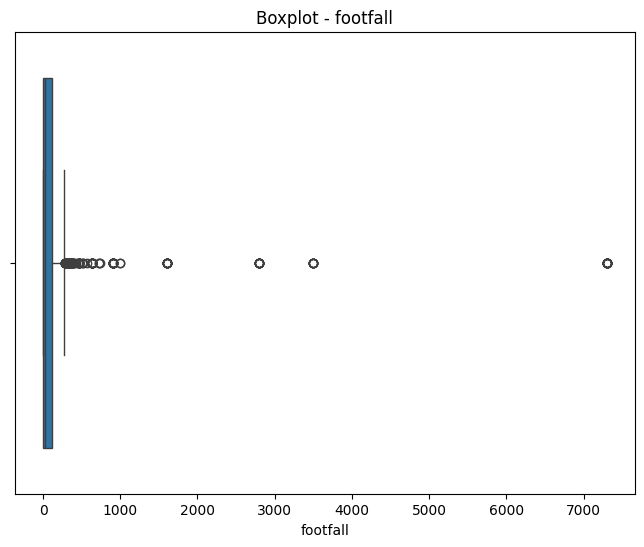


Analysis column: tempMode
Mean: 3.7277542372881354
Median: 3.0
Mode: 7
Unique values: 8
Number of outliers: 0


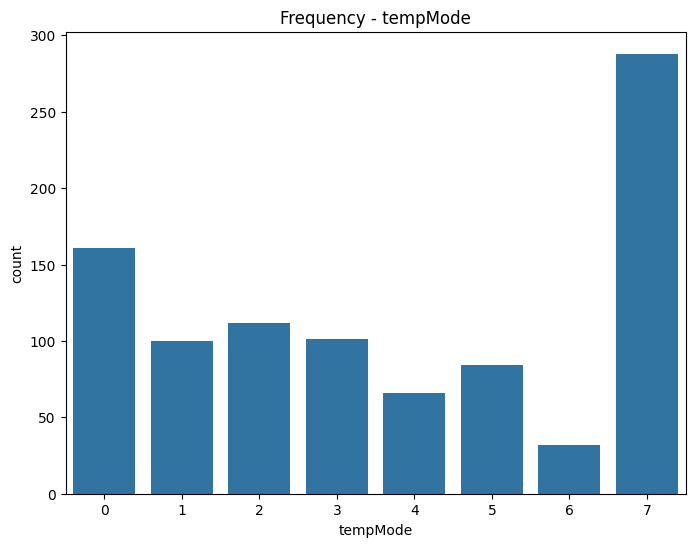


Analysis column: AQ
Mean: 4.325211864406779
Median: 4.0
Mode: 4
Unique values: 7
Number of outliers: 0


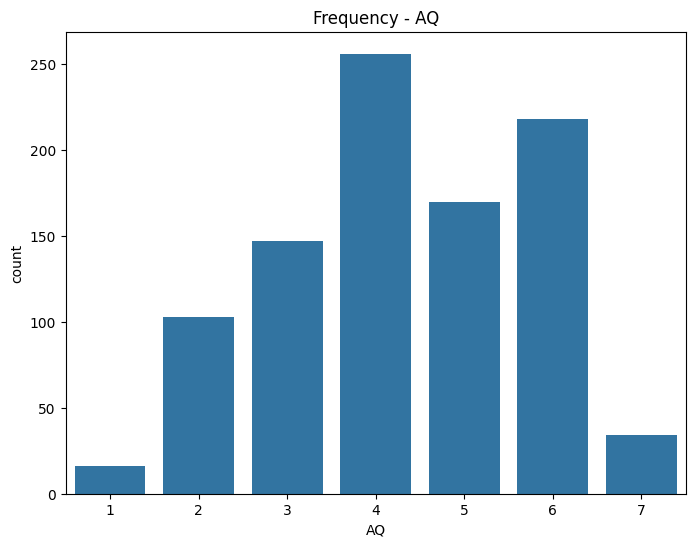


Analysis column: USS
Mean: 2.9396186440677967
Median: 3.0
Mode: 2
Unique values: 7
Number of outliers: 0


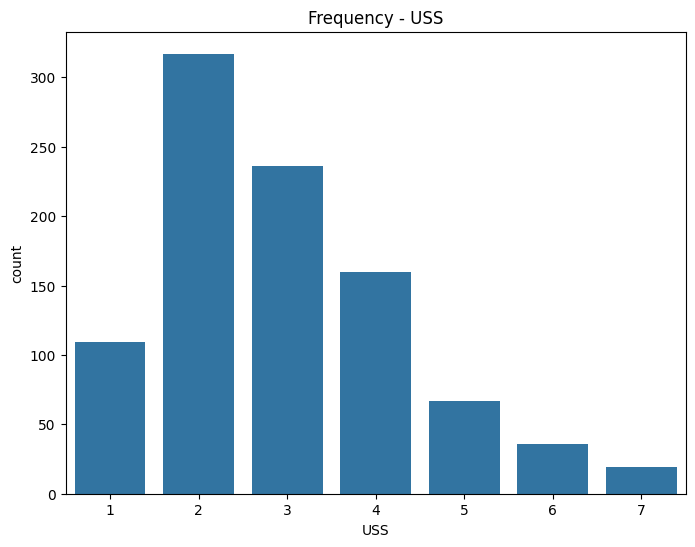


Analysis column: CS
Mean: 5.3940677966101696
Median: 6.0
Mode: 6
Unique values: 7
Number of outliers: 87


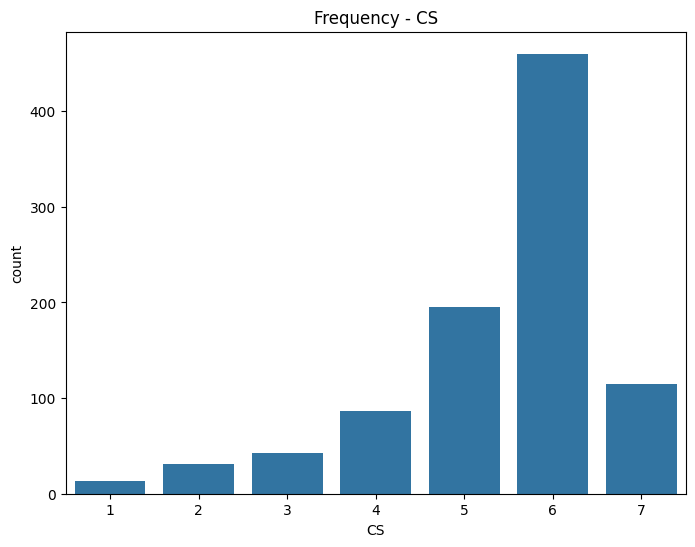


Analysis column: VOC
Mean: 2.8421610169491527
Median: 2.0
Mode: 0
Unique values: 7
Number of outliers: 0


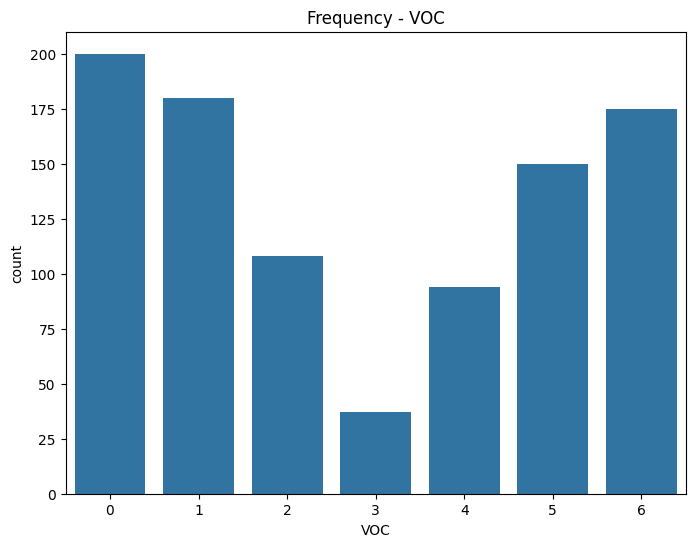


Analysis column: RP
Mean: 47.043432203389834
Median: 44.0
Mode: 35
Unique values: 71
Number of outliers: 0


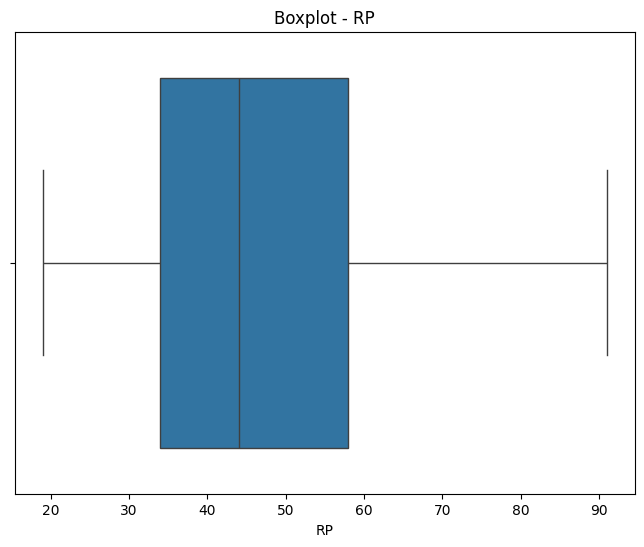


Analysis column: IP
Mean: 4.565677966101695
Median: 4.0
Mode: 3
Unique values: 7
Number of outliers: 0


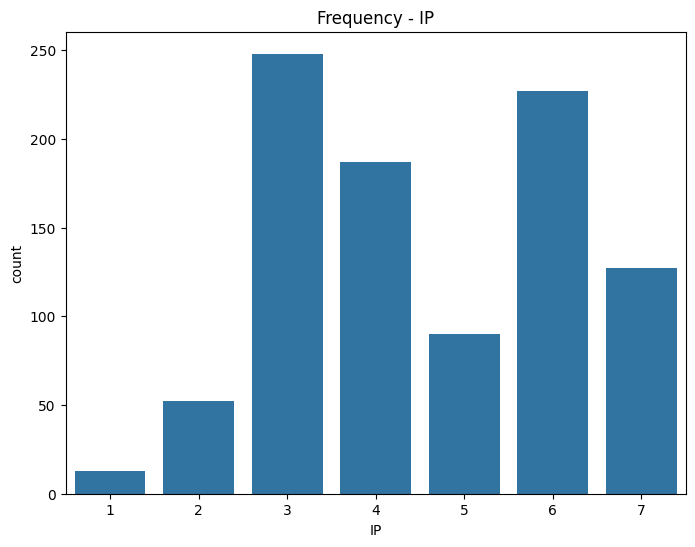


Analysis column: Temperature
Mean: 16.33156779661017
Median: 17.0
Mode: 21
Unique values: 24
Number of outliers: 48


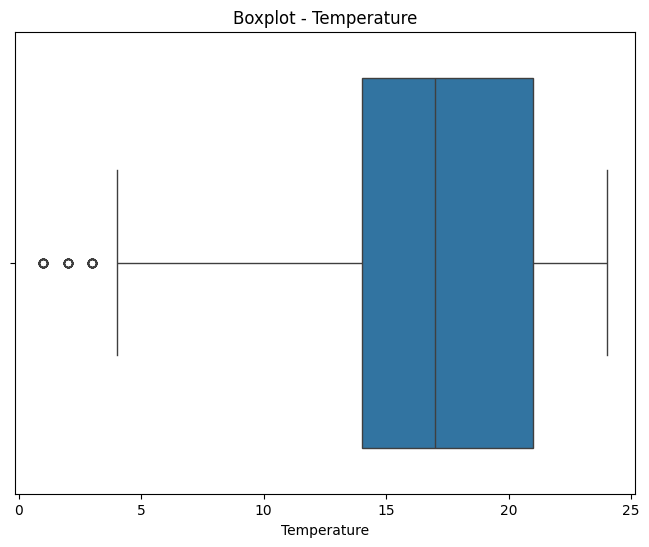


Analysis column: fail
Mean: 0.4163135593220339
Median: 0.0
Mode: 0
Unique values: 2
Number of outliers: 0


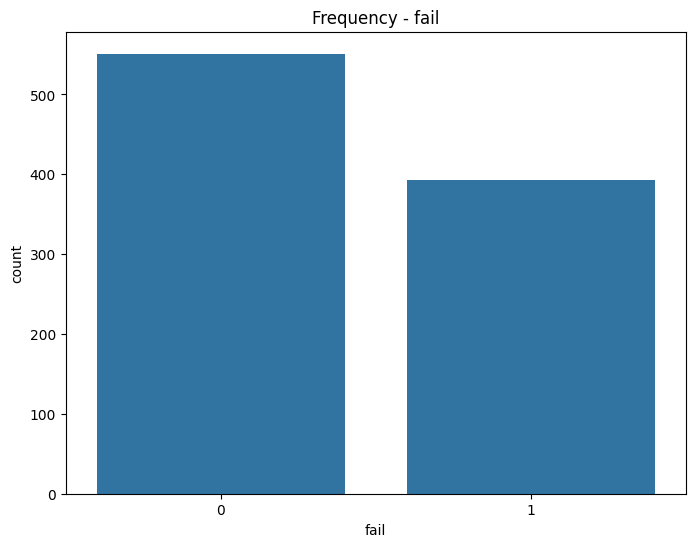

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('sensors.csv', sep=';')

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

def analyze_column(col):
    print(f"\nAnalysis column: {col}")

    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Mode: {df[col].mode()[0]}")
    print(f"Unique values: {df[col].nunique()}")

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"Number of outliers: {len(outliers)}")


    plt.figure(figsize=(8, 6))
    if df[col].dtype == 'object' or df[col].nunique() < 20:
        sns.countplot(x=df[col])
        plt.title(f'Frequency - {col}')
    else:
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot - {col}')
    plt.show()

for col in numeric_cols:
    analyze_column(col)


# 3.4 Bivariate/multivariate analysis

First rows of the DataFrame:
   footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
0         0         7   7    1   6    6  36   3            1     1
1       190         1   3    3   5    1  20   4            1     0
2        31         7   2    2   6    1  24   6            1     0
3        83         4   3    4   5    1  28   6            1     0
4       640         7   5    6   4    0  68   6            1     0

Column types:
footfall       int64
tempMode       int64
AQ             int64
USS            int64
CS             int64
VOC            int64
RP             int64
IP             int64
Temperature    int64
fail           int64
dtype: object

Numeric columns:
Index(['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP',
       'Temperature', 'fail'],
      dtype='object')

Correlation Matrix:
             footfall  tempMode        AQ       USS        CS       VOC  \
footfall     1.000000  0.020457 -0.065816  0.019453  0.025638 -0.089590   
tempMode     0.0204

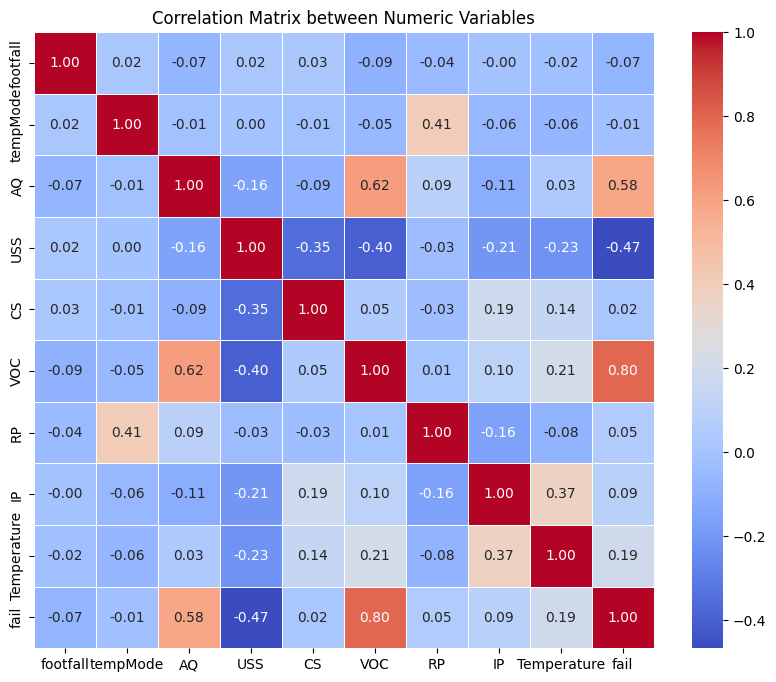

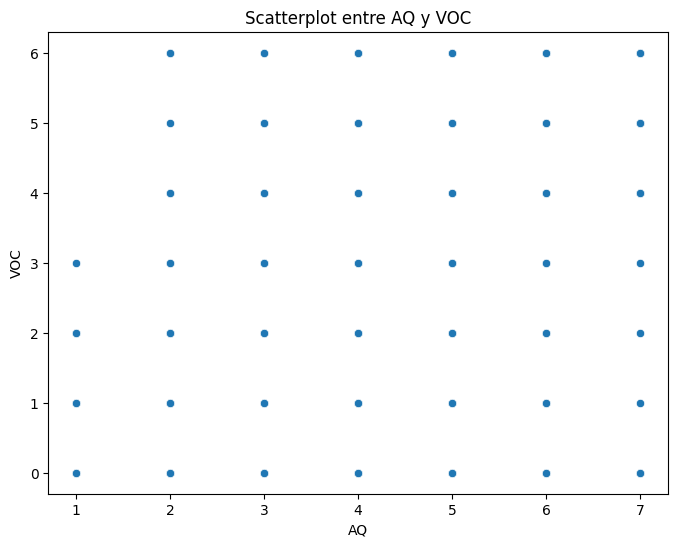

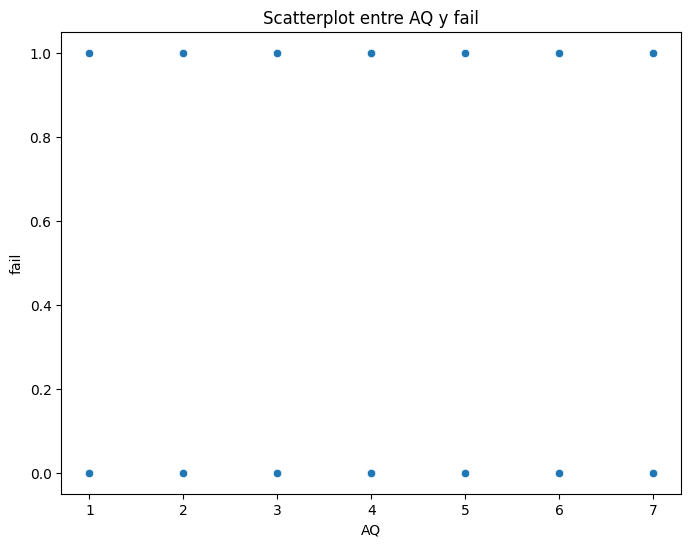

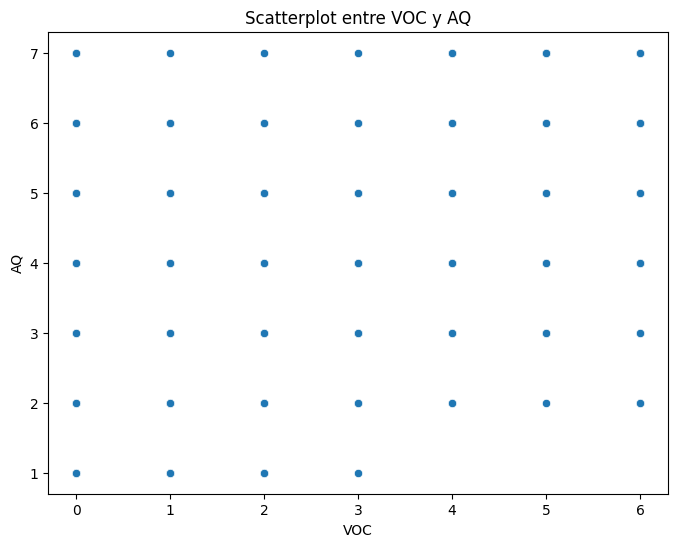

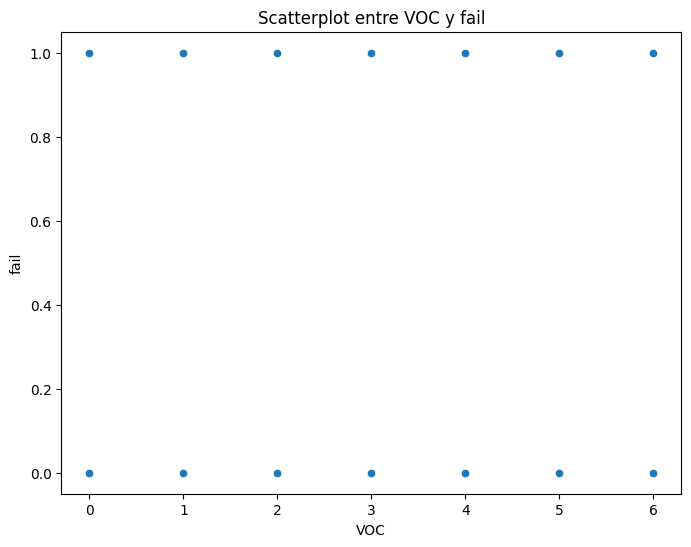

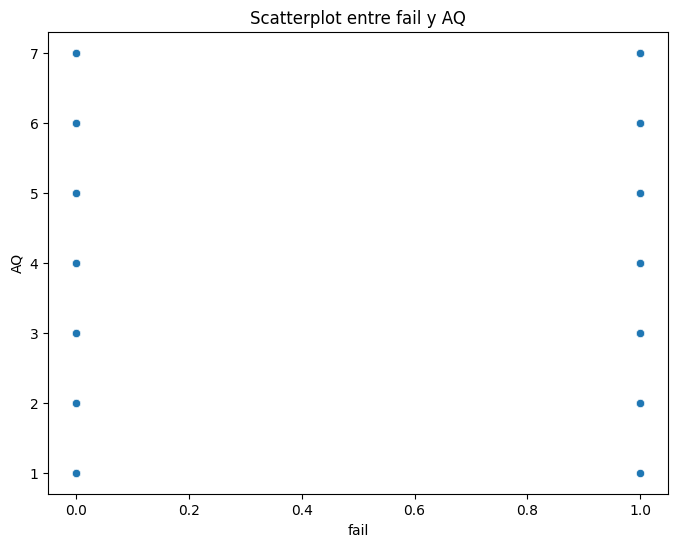

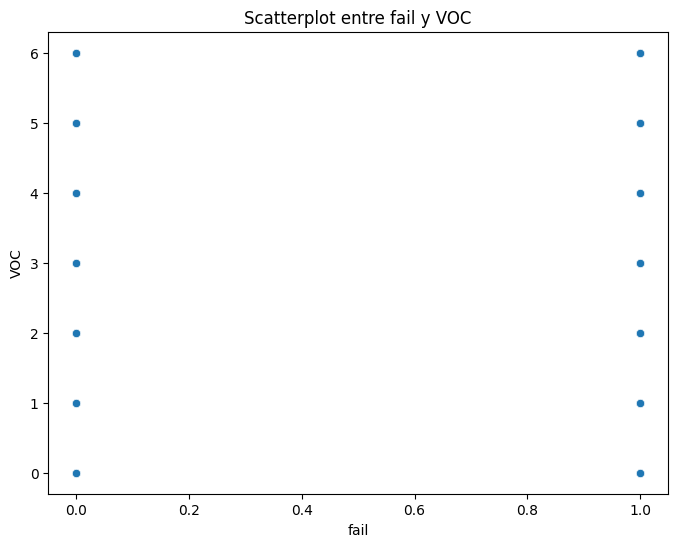

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('sensors.csv', sep=";")

print("First rows of the DataFrame:")
print(df.head())

print("\nColumn types:")
print(df.dtypes)

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


print("\nNumeric columns:")
print(numeric_cols)

def analyze_bivariable(df, numeric_cols):
    if numeric_cols.size == 0:
        print("No numeric columns were found in the DataFrame.")
        return


    corr_matrix = df[numeric_cols].corr()


    print("\nCorrelation Matrix:")
    print(corr_matrix)

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Matrix between Numeric Variables')
    plt.show()

    for col1 in numeric_cols:
        for col2 in numeric_cols:
            if col1 != col2 and abs(corr_matrix[col1][col2]) > 0.5:
                plt.figure(figsize=(8, 6))
                sns.scatterplot(x=df[col1], y=df[col2])
                plt.title(f'Scatterplot entre {col1} y {col2}')
                plt.xlabel(col1)
                plt.ylabel(col2)
                plt.show()

analyze_bivariable(df, numeric_cols)

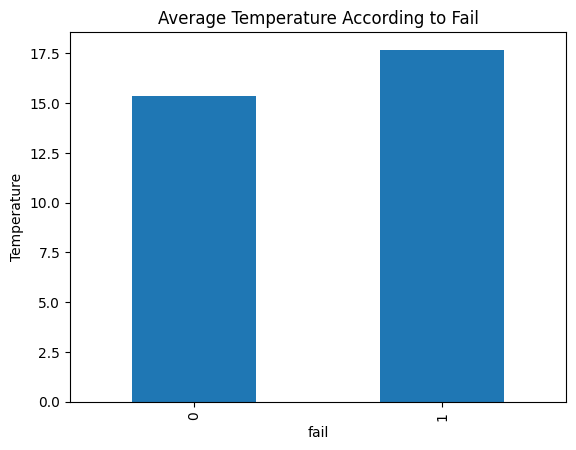

In [ ]:
df.groupby('fail')['Temperature'].mean().plot(kind='bar')
plt.title('Average Temperature According to Fail')
plt.ylabel('Temperature')
plt.show()

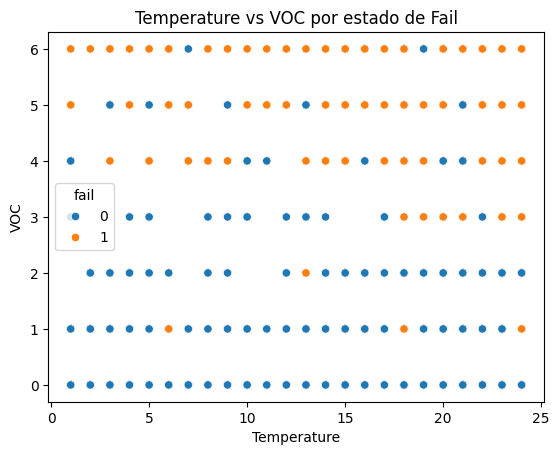

In [ ]:
sns.scatterplot(x='Temperature', y='VOC', hue='fail', data=df)
plt.title('Temperature vs VOC por estado de Fail')
plt.show()

# 3.5 Secondary cleaning / refining

footfall: 154 outliers


<ipython-input-14-a087c2a73e19>:9: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


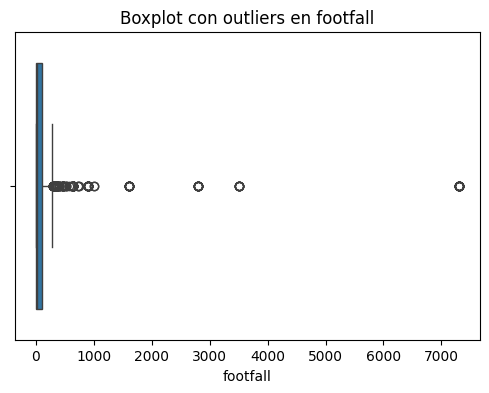

tempMode: 0 outliers
AQ: 0 outliers
USS: 0 outliers
CS: 87 outliers


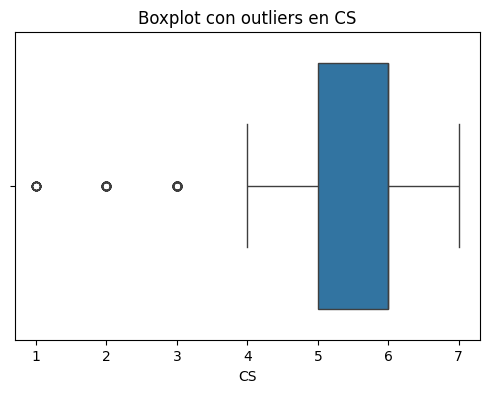

VOC: 0 outliers
RP: 0 outliers
IP: 0 outliers
Temperature: 48 outliers


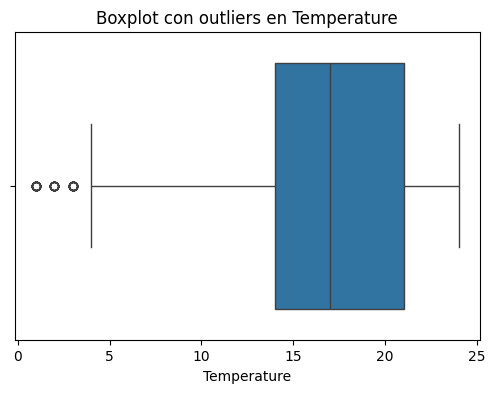

fail: 0 outliers


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('sensors.csv', sep=';')


df = df.apply(pd.to_numeric, errors='ignore')

numeric_cols = df.select_dtypes(include=[np.number]).columns


def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers


for col in numeric_cols:
    outliers = detect_outliers(df, col)
    print(f"{col}: {len(outliers)} outliers")
    if len(outliers) > 0:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot con outliers en {col}')
        plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv("sensors.csv", sep=';')

df = df.apply(pd.to_numeric, errors='ignore')

def marcar_outliers_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df[columna] < Q1 - 1.5 * IQR) | (df[columna] > Q3 + 1.5 * IQR)
    df[f'is_outlier_{columna}'] = outliers
    return df

variables_con_outliers = ['footfall', 'CS', 'Temperature']

for col in variables_con_outliers:
    df = marcar_outliers_iqr(df, col)

for col in variables_con_outliers:
    print(f"{col}: {df[f'is_outlier_{col}'].sum()} outliers marcados")

print(df)

footfall: 154 outliers marcados
CS: 87 outliers marcados
Temperature: 48 outliers marcados
     footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail  \
0           0         7   7    1   6    6  36   3            1     1   
1         190         1   3    3   5    1  20   4            1     0   
2          31         7   2    2   6    1  24   6            1     0   
3          83         4   3    4   5    1  28   6            1     0   
4         640         7   5    6   4    0  68   6            1     0   
..        ...       ...  ..  ...  ..  ...  ..  ..          ...   ...   
939         0         7   7    1   6    4  73   6           24     1   
940         0         7   5    2   6    6  50   6           24     1   
941         0         3   6    2   7    5  43   6           24     1   
942         0         6   6    2   5    6  46   7           24     1   
943        18         7   4    2   6    3  61   7           24     1   

     is_outlier_footfall  is_outlier_CS  is_

<ipython-input-15-e13d1a5ca19c>:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


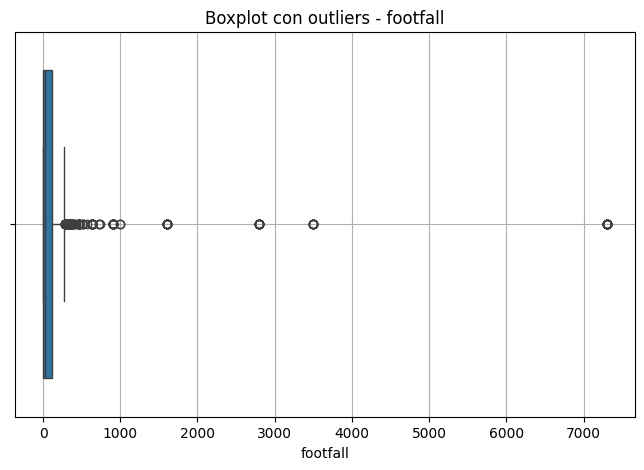

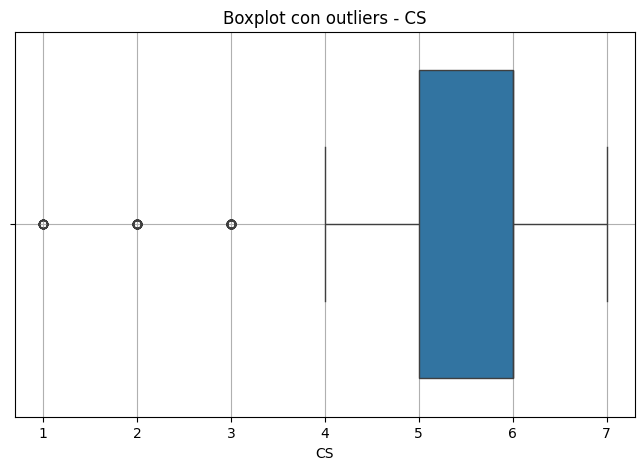

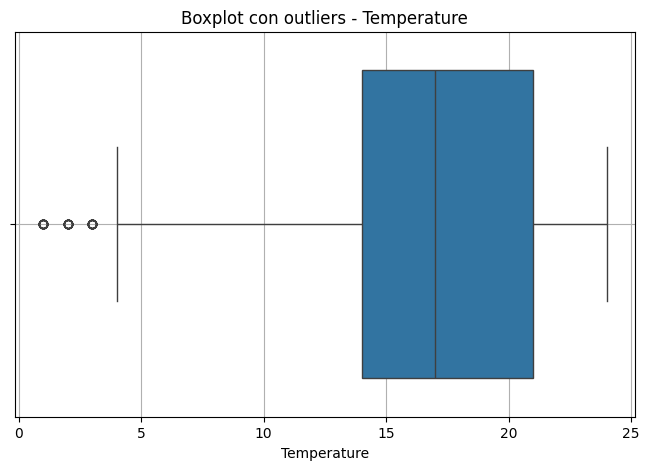

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


variables_con_outliers = ['footfall', 'CS', 'Temperature']

for col in variables_con_outliers:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot con outliers - {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

# 3.6 Statistical analysis

a) Hypothesis test

In [ ]:
from scipy.stats import ttest_ind

group_0 = df[df['fail'] == 0]
group_1 = df[df['fail'] == 1]


for col in numeric_cols:
  if col != 'fail':
    t_stat, p_value = ttest_ind(group_0[col], group_1[col], equal_var=False)
    print(f'{col}: t={t_stat:.2f}, p={p_value:.4f} {"CHECK" if p_value < 0.05 else "NOT CHECK"}')

footfall: t=2.35, p=0.0187 CHECK
tempMode: t=0.44, p=0.6577 NOT CHECK
AQ: t=-22.86, p=0.0000 CHECK
USS: t=17.01, p=0.0000 CHECK
CS: t=-0.62, p=0.5323 NOT CHECK
VOC: t=-41.73, p=0.0000 CHECK
RP: t=-1.65, p=0.0995 NOT CHECK
IP: t=-2.66, p=0.0079 CHECK
Temperature: t=-6.14, p=0.0000 CHECK


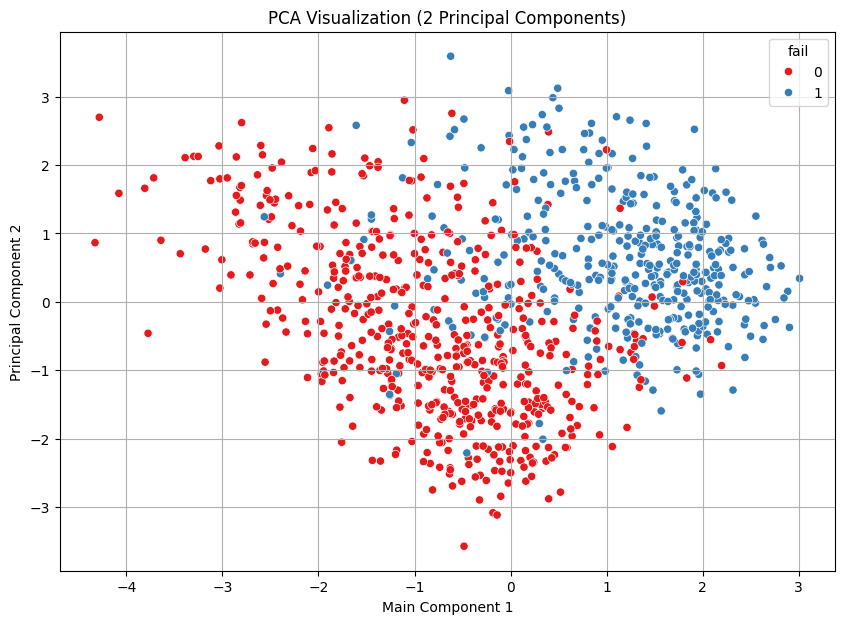

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

numeric_cols = ['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_cols])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['fail'] = df['fail']

plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='fail', palette='Set1')
plt.title('PCA Visualization (2 Principal Components)')
plt.xlabel('Main Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [ ]:
print("Variance explained by each component:", pca.explained_variance_ratio_)
print("Total variance explained:", pca.explained_variance_ratio_.sum())

Variance explained by each component: [0.22688645 0.17972591]
Total variance explained: 0.40661235743585267


# 4. Feature engineering and preprocessing

a) Creation of new variables

     footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail  \
0           0         7   7    1   6    6  36   3            1     1   
1         190         1   3    3   5    1  20   4            1     0   
2          31         7   2    2   6    1  24   6            1     0   
3          83         4   3    4   5    1  28   6            1     0   
4         640         7   5    6   4    0  68   6            1     0   
..        ...       ...  ..  ...  ..  ...  ..  ..          ...   ...   
939         0         7   7    1   6    4  73   6           24     1   
940         0         7   5    2   6    6  50   6           24     1   
941         0         3   6    2   7    5  43   6           24     1   
942         0         6   6    2   5    6  46   7           24     1   
943        18         7   4    2   6    3  61   7           24     1   

     is_outlier_footfall  is_outlier_CS  is_outlier_Temperature  \
0                  False          False                    True   
1

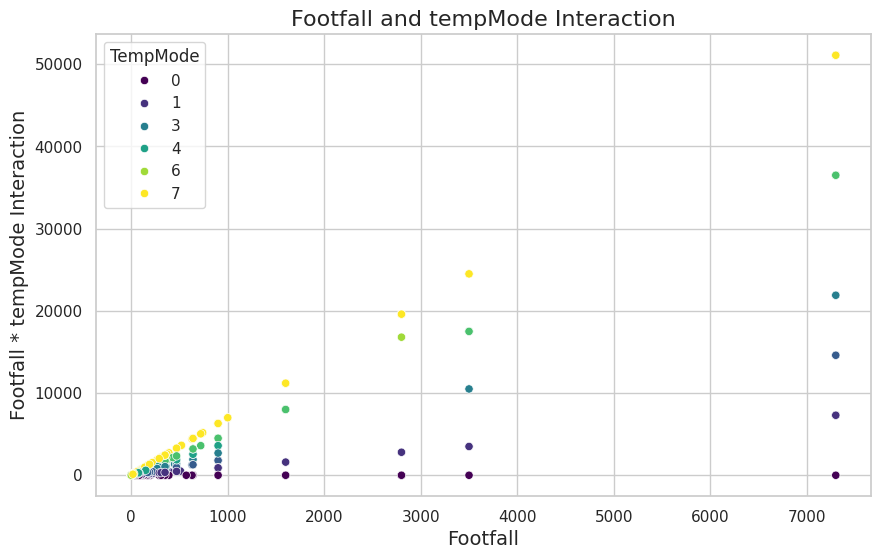

In [ ]:
df['footfall_tempMode_interaction'] = df['footfall'] * df['tempMode']
print(df)
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='footfall', y='footfall_tempMode_interaction', data=df, hue='tempMode', palette='viridis')

plt.title('Footfall and tempMode Interaction', fontsize=16)
plt.xlabel('Footfall', fontsize=14)
plt.ylabel('Footfall * tempMode Interaction', fontsize=14)

plt.legend(title='TempMode')

plt.show()

In [ ]:
import os

folder_path = '/content/drive/MyDrive/Projects_ML/Project_Sensors'
os.makedirs(folder_path, exist_ok=True)

saved_path = os.path.join(folder_path, 'df_cl.csv')
df.to_csv(saved_path, index=False)
